# DSTEP20 // Assignment #2 **SOLUTIONS**

assigned : **Jan 15, 2020**

DUE : **Jan 22, 2020 11:59pm**

## Are NYC congresspeople tweeting about New Yorker's concerns?

<img src="https://www.dailydot.com/wp-content/uploads/2019/01/twitter-on-capitol-hill.jpg" width=625>

---

### OVERVIEW

Social media use by congress is [booming](https://fas.org/sgp/crs/misc/R45337.pdf), with members using the platform to directly engage with their constiuents, take part in the national conversation around timely issues, and fundraise for (re)election.  Participation in social media discourse is quickly becoming [mandatory](https://fcw.com/articles/2018/08/08/social-media-congress.aspx) for public servants looking to both compete in the messaging game and solicit feedback from those who are affected by their policies.

At the same time, from the social science perspective, social media is frought with participation bias of all sorts and so it is not clear that the conversation on social media platforms tracks with the lived experience of the electorate.  In this assignment, you will be determining whether members of Congress representing New York City are using social media to highlight the common issues that New Yorkers are facing as measured by 311 service requests.

<u>**Instructions for tasks that will be graded are in bold below.**</u>

### PART 1 - Background

<b>
Provide a brief (no more than 500 words) descriptive overview of 

1. the use of social media by public servants and congress in particular, and

2. the rise of the 311 service in New York City including the reasons for its implementation, operational methods, and characteristics of the datasets available via NYC's Open Data Portal,

that can serve as the background for the results that you derive below.  As you lay out this Background for this assignment, an important characteristic to consider is bias (in a statistical as opposed to cultural sense).  For example:

- Who is using social media platforms?
- Who is calling into 311 in NYC?
- Is the scope of 311 a reasonable tracer of the issues facing citizens?
- What is divide between social media personality of a congressperson and their actual legislative agenda?

Please include *references* within the description via weblinks (like the "booming" link in the Overview in the cell above).
</b>

TEXT FOR ANSWER HERE

### PART 2 - Accessing and Analyzing Congressional Tweets

You will be working with two datasets for this assignment.  The first is all of the tweets from every member of congress from 2019.  This file can be found in the folder dstep20/data/congress_tweets/congress_tweets_2019.tsv.  The second is the 311 service requests from NYC that we accessed in class and which can be found [here](https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9).

**Load the congressional tweets data from Google Drive into a DataFrame called tweets.$^{\dagger}$**

<small> $^{\dagger}$ Hint, the data is a tab separated file and the tab character can be represented by the string "\t".  Also, be sure to specify the lineterminator to be the newline character "\n". </small>

In [56]:
from google.colab import drive
drive.mount("/content/drive")

import numpy as np
import pandas as pd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# -- read in the tweets
tweets = pd.read_csv("drive/My Drive/dstep20/data/congress_tweets/congress_tweets_2019.tsv", sep="\t", lineterminator="\n")

**Split the tweet column into a screen name and the tweet text, and add those back to the oringinal tweets DataFrame with column names "screen_name" and "text".**

In [0]:
# -- split tweet column into list of lists
ll_tweets = tweets["tweet"].str.split(":").to_list()

# -- create temporary DataFrame 
temp = pd.DataFrame(ll_tweets, columns=["screen_name", "text"])

# -- put screen_name and text back into original tweets dataframe
tweets["screen_name"] = temp["screen_name"]
tweets["text"]        = temp["text"]

The screen names for only congresspeople representing the citizens of NYC can be found in the file dstep20/data/congress_tweets/nyc_congress_screen_names.csv.

**Sub-select only those tweets coming from congresspeople representing NYC using the list of screen names from the congress_screen_names.csv file and the .isin method of the tweets DataFrame.  Call this new DataFrame (consisting only of tweets for NYC) nyc_tw.**

In [0]:
# -- read in the NYC screen_names
sn_nyc = pd.read_csv("drive/My Drive/dstep20/data/congress_tweets/nyc_congress_screen_names.csv")

# -- subselect only tweets from NYC screen names
nyc_tw = tweets[tweets["screen_name"].isin(sn_nyc["screen_name"])]

**What is the total fraction of all congresspeople's tweets that are sent by congresspeople representing NYC?**

In [9]:
# -- fraction of tweets that are NYC tweets
print("fraction of tweets that are NYC tweets {0}".format(len(nyc_tw) / len(tweets)))

fraction of tweets that are NYC tweets 0.037703050012892064


**How does that fraction compare to the fraction of the US population that are New Yorkers?**

In [10]:
# -- compared to population of USA
print("fraction of US population that are NYCers {0}".format(8623000 / 327200000))

fraction of US population that are NYCers 0.026353911980440098


**Make a bar plot (<u>including a descriptive caption</u>) of the total number of tweets for each screen name in nyc_tw in descending order.**

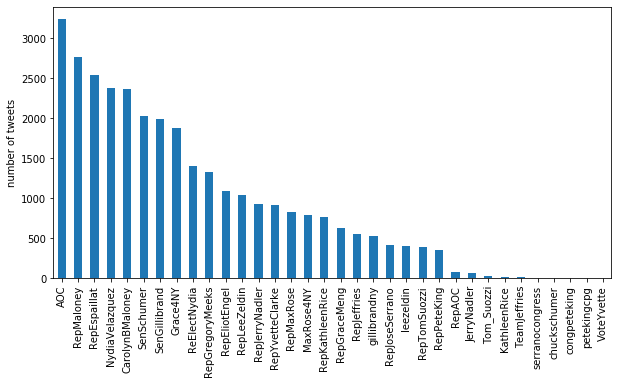

In [14]:
# -- group by screen name and count
nyc_numtw = nyc_tw.groupby("screen_name").count()

# -- sort values according to value in text column (which is the total number of tweets since text does not contain NaNs)
nyc_numtw = nyc_numtw.sort_values("text", ascending=False)

# -- bar plot (in descending order) of number of tweets for each screen name
ax = nyc_numtw.plot.bar(y="text", use_index=True, legend=False, figsize=[10, 5])
xlab = ax.set_xlabel("")
ylab = ax.set_ylabel("number of tweets")

The number of tweets in 2019 for a given screen name in descending order for congresspeople representing the city of New York.  The most frequent screen name (AOC) tweeted just under 10 times per day on average in 2019.  Many congresspeople have multiple screen names (e.g., RepAOC) that are often used for separate activities such as re-election campaigning (e.g., VoteYvette).

Before we compare the content of the tweets with 311 Service Requests, let's practice by searching the NYC tweets for certain topical words/phrases that are current.

**What is the fraction of NYC tweets that contain the word "gun" or "guns"?**

In [18]:
# -- count the fraction of tweets that contain the word "gun" or "guns" appears in these tweets
#    Note, this is a non-exhaustive list as other punctuations might exist as well
tot = 0
tot = tot + nyc_tw["text"].str.lower().str.contains(" gun ").sum()
tot = tot + nyc_tw["text"].str.lower().str.contains(" guns ").sum()
tot = tot + nyc_tw["text"].str.lower().str.contains(" gun.").sum()
tot = tot + nyc_tw["text"].str.lower().str.contains(" guns.").sum()
tot = tot + nyc_tw["text"].str.lower().str.contains(".gun ").sum()
tot = tot + nyc_tw["text"].str.lower().str.contains(".guns ").sum()
tot = tot + nyc_tw["text"].str.lower().str.contains(" gun\!").sum()
tot = tot + nyc_tw["text"].str.lower().str.contains(" guns\!").sum()
tot = tot + nyc_tw["text"].str.lower().str.contains(" gun\?").sum()
tot = tot + nyc_tw["text"].str.lower().str.contains(" guns\?").sum()
tot = tot + nyc_tw["text"].str.lower().str.contains(" gun,").sum()
tot = tot + nyc_tw["text"].str.lower().str.contains(" guns,").sum()
tot = tot + nyc_tw["text"].str.lower().str.contains(",gun ").sum()
tot = tot + nyc_tw["text"].str.lower().str.contains(",guns ").sum()

print("estimated fraction of tweets that contain the word \"gun\" or \"guns\" {0}".format(tot / len(nyc_tw)))

estimated fraction of tweets that contain the word "gun" or "guns" 0.08653997667895749


**What fraction of the NYC tweets contain the phrase "medicare for all"?**

In [32]:
# -- count the fraction of tweets that contain the phrase "medicare for all" appears in these tweets
tot = nyc_tw["text"].str.lower().str.contains("medicare for all").sum()

print("estimated fraction of tweets that contain the phrase \"medicare for all\" {0}".format(tot / len(nyc_tw)))

estimated fraction of tweets that contain the phrase "medicare for all" 0.0021430147174687215


**What fraction of the NYC tweets tag the President of the US's official twitter account?**

In [37]:
# -- count the fraction of tweets tag the president of the US's official twitter account
tot = nyc_tw["text"].str.lower().str.contains("@realdonaldtrump").sum()

print("estimated fraction of tweets that contain \"@realDonaldTrump\" {0}".format(tot / len(nyc_tw)))

estimated fraction of tweets that contain "@realDonaldTrump" 0.047083293939680436


### PART 3 - Accessing 311 Service Request Data


<b>Use the sodapy module to load the 311 service requests for NYC from Jan 1st, 2019 to Jan 1st 2020 into a DataFrame.  The solution should include: 

- use pip to install sodapy

- set the query return limit to 10000000 (to make sure you get them all)

- set the query to return only the unique_key, created_date, and complaint_type columns

- set an appropriate connection timeout

- name the DataFrame nyc_311

</b>

In [38]:
# -- Use the pip command to install sodapy
!pip install sodapy

In [0]:
# -- import sodapy for working with Socrata backends
from sodapy import Socrata

In [0]:
# -- set the domain
dom = "data.cityofnewyork.us"

# -- set the data set id
dsid = "erm2-nwe9"

# -- set the limit
lim = 10000000

# -- define my app token (THIS IS A DUMMY TOKEN, YOU MUST USE YOUR OWN!)
app_tok = "gSsXTS1a0656usC3cYU7p5owR"

# -- Load the unique_key, created_date, and complaint_type for all 311 service requests from NYC Open Data from 2019-01-01 to 2020-01-01.$
client = Socrata(dom, app_tok, timeout=120)

results = client.get(dsid, limit=lim, select="unique_key,created_date,complaint_type", 
                     where="created_date between '2019-01-01T00:00:00' and '2020-01-01T00:00:00.000'")

# -- push results into DataFrame
nyc_311 = pd.DataFrame.from_records(results)

In [55]:
nyc_311

,unique_key,created_date,complaint_type
0,41309122,2019-01-01T00:00:00.000,Rodent
1,41310910,2019-01-01T00:00:00.000,Rodent
2,41314898,2019-01-01T00:00:00.000,Rodent
3,41315045,2019-01-01T00:00:00.000,Rodent
4,41315071,2019-01-01T00:00:00.000,Rodent
...,...,...,...
2456823,45285651,2020-01-01T00:00:00.000,Food Poisoning
2456824,45285347,2020-01-01T00:00:00.000,Food Poisoning
2456825,45289555,2020-01-01T00:00:00.000,Food Poisoning
2456826,45288120,2020-01-01T00:00:00.000,Food Poisoning


**How many NaN's are there in each column?**

In [42]:
# -- print the number of NaNs in each column
print(nyc_311.isna().sum(axis=0))

unique_key        0
created_date      0
complaint_type    0
dtype: int64


**What are the unique values of complaint type?**

In [43]:
# -- print the unique values of complaint type
print(np.unique(nyc_311["complaint_type"]))

['$(sleep 11)' '${3804*3137}' '%2e%2e%2f%2e%2e%2f%2e%2e%2f...'
 '%2e%2e%5c%2e%2e%5c%2e%2e%5c...' '%2fetc%2fpasswd'
 '%E5%98%8A%E5%98%8DX-Injecti...' '%c0%ae/%c0%ae/%c0%ae/%c0%ae...'
 '%c0%ae/%c0%ae/%c0%ae/WEB-IN...' '%c0%ae/%c0%ae/WEB-INF/web.xml'
 '%c0%ae/WEB-INF/web.xml' '%{(#dm=@ognl.OgnlContext@DE...' '%{4761*8506}'
 '&lt;odb xmlns:xi=&quot;http...' '&lt;vlv xmlns=&quot;http://...'
 "&quot;--&gt;'--&gt;`--&gt;&..." '() { :;}; /bin/sleep 0'
 '() { :;}; /bin/sleep 11' '() { _; } &gt;_'
 '(select extractvalue(xmltyp...' "(select load_file('\\\\\\\\615h..."
 '*)(!(objectClass=*)' '*)(objectClass=*' '.../....///.../....///.../....'
 '.../...//.../...//.../...//...' '..././..././..././..././......'
 '.../.\\.../.\\.../.\\.../.\\......' '.../Misc. Comments'
 '...\\./...\\./...\\./...\\./......'
 '...\\.\\...\\.\\...\\.\\...\\.\\......' '../../../../../../../../../...'
 '../../../../WEB-INF/web.xml' '../../../WEB-INF/web.xml'
 '../../../WEB-INF/web.xml;x=' '../../WEB-INF/web.xml'
 '../../W

**Make a bar plot (<u>including a descriptive caption</u>) of the top 10 most common complaint types in the 2019 NYC 311 data in descending order left to right.**

In [0]:
# -- groupby complaint type and count (since unique_key does not have any NaN 
#    values, that column will contain an accurate count of the number of 
#    complaints for a given type)
ct_311 = nyc_311.groupby("complaint_type").count()

# -- sort by the total number of each type (descending) and pick off top 10
top10_311 = ct_311.sort_values("unique_key", ascending=False)[:10]

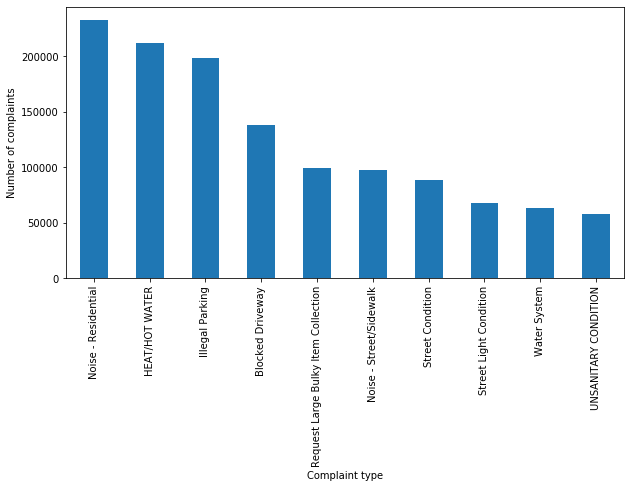

In [54]:
# -- make the plot
ax = top10_311.plot.bar(y="unique_key", use_index=True, legend=False, figsize=[10, 5])
xlab = ax.set_xlabel("Complaint type")
ylab = ax.set_ylabel("Number of complaints")

The number of complaints as a function of complaint type for the top 10 complaint types to NYC's 311 Service Request line.  The dominant complaint subjects are noise-related ("Noise - Residential", "Noise - Street/Sidewalk"), parking-related ("illegal parking", "blocked driveway"), and water service-related ("HEAT/HOT WATER", "Water System").

### PART 4 - Combining Congressional Tweets and 311 Service Request Analyses



<b>Combine the methodology for searching NYC congressional tweets that you developed in Part 2 with the 311 Service Request data that you have explored in Part 3 to address the question of whether congresspeople representing NYC are using social media as a platform to highlight these issues.

This part of the assignment is purposefully open-ended as there are numerous ways to address the question.  For whatever evidence that you provide, describe the assumptions and approximations as well as potential biases or missing perspectives that might impact your conclusions.</b>

### EXTRA CREDIT - the case of another city

The raw data for the congressional tweets can be found [here](https://github.com/alexlitel/congresstweets) and [here](https://github.com/alexlitel/congresstweets/tree/master/data).

**Repeat the analysis in this notebook for <u>another</u> US city of your choosing for the <u>year 2018</u>.**





